# Importing the Libraries

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Making Predictions

In [2]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [3]:
def forward(x):
    y = w * x + b
    return y

In [4]:
x = torch.tensor(2)
print(forward(x))

tensor(7., grad_fn=<AddBackward0>)


In [5]:
x = torch.tensor([[4], [7]])
print(forward(x))

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)


# Linear Class

In [6]:
torch.manual_seed(1)
model = nn.Linear(in_features=1, out_features=1)
print(model.weight, model.bias)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [7]:
x = torch.tensor([2.0])
print(model(x))

tensor([0.5891], grad_fn=<AddBackward0>)


In [8]:
x = torch.tensor([[2.0], [3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward0>)


# Custom Modules

In [9]:
class LR(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = self.linear(x)
        return pred

In [10]:
torch.manual_seed(1)
model = LR(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [11]:
x = torch.tensor([1.0])
print(model.forward(x))

tensor([0.0739], grad_fn=<AddBackward0>)


In [12]:
x = torch.tensor([[1.0], [2.0]])
print(model.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)


# Creating Dataset

In [13]:
X = torch.randn(10, 1)
print(X)

tensor([[ 0.1163],
        [ 0.7213],
        [ 0.5636],
        [ 1.1431],
        [ 0.8590],
        [ 0.7056],
        [-0.3406],
        [-1.2720],
        [-1.1948],
        [ 0.0250]])


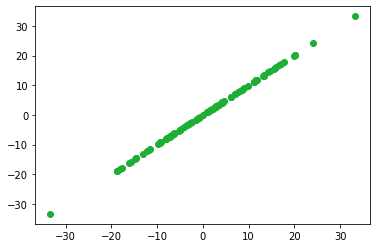

In [14]:
X = torch.randn(100, 1) * 10
y = X
plt.plot(X.numpy(), y.numpy(), 'o', c=np.random.rand(3))

Text(0.5, 0, 'x')

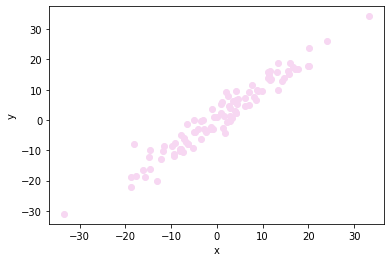

In [15]:
y = X + 3 * torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o', c=np.random.rand(3))
plt.ylabel('y')
plt.xlabel('x')

In [16]:
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [17]:
[w, b] = model.parameters()
print([w, b])

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [18]:
w1 = w[0][0]
b1 = b[0]
print(w1, b1)

tensor(0.5153, grad_fn=<SelectBackward0>) tensor(-0.4414, grad_fn=<SelectBackward0>)


In [19]:
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)

0.5152631998062134 -0.44137823581695557


In [20]:
def get_params():
    return (w[0][0].item(), b[0].item())

In [21]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y, color=np.random.rand(3))
    plt.show()

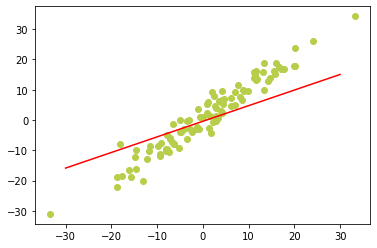

In [22]:
plot_fit("Initial Model")

# Training - Code Implementation